# Import Packages And Dataset

In [145]:
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

#  Loading Dataset
superstore = pd.read_csv('C:/Users/stmro/Desktop/notebook/Data.csv')
superstore_data=superstore.iloc[:5000]
superstore_data


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,4132,MX-2013-VF2171518-41591,11/13/2013,11/13/2013,Same Day,VF-2171518,Vicky Freymann,Home Office,Toledo,Parana,...,FUR-CH-4530,Furniture,Chairs,"Harbour Creations Executive Leather Armchair, ...","$2,221.80",7,0%,$622.02,810.250,Critical
1,22999,IN-2013-BP1123058-41329,2/24/2013,2/24/2013,Same Day,BP-1123058,Benjamin Patterson,Consumer,Surat,Gujarat,...,FUR-CH-5443,Furniture,Chairs,"Office Star Executive Leather Armchair, Red","$1,878.72",4,0%,$582.36,704.080,Critical
2,13847,IT-2014-EB1384045-41706,3/8/2014,3/8/2014,Same Day,EB-1384045,Ellis Ballard,Corporate,Montreuil,Ile-de-France,...,FUR-CH-5441,Furniture,Chairs,"Office Star Executive Leather Armchair, Adjust...","$2,092.50",5,10%,$720.75,652.980,Critical
3,28701,IN-2015-SW2027558-42125,5/1/2015,5/1/2015,Same Day,SW-2027558,Scott Williamson,Consumer,Jamshedpur,Jharkhand,...,TEC-MA-5007,Technology,Machines,"Konica Inkjet, White","$2,174.13",7,0%,$500.01,637.860,Critical
4,42336,MZ-2014-DG330087-41991,12/18/2014,12/18/2014,Same Day,DG-330087,Deirdre Greer,Corporate,Maputo,Cidade De Maputo,...,TEC-PH-5269,Technology,Phones,"Motorola Smart Phone, with Caller ID","$2,582.16",4,0%,$593.88,627.170,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5436,MX-2012-EB1384093-41197,10/15/2012,10/19/2012,Standard Class,EB-1384093,Ellis Ballard,Corporate,Matagalpa,Matagalpa,...,TEC-CO-4773,Technology,Copiers,"HP Fax Machine, Color",$601.55,3,0%,-$1.21,66.728,High
4996,50638,CA-2013-BF108023-41454,6/29/2013,7/3/2013,Second Class,BF-108023,Bart Folk,Consumer,Edmonton,Alberta,...,TEC-CO-4592,Technology,Copiers,"Hewlett Wireless Fax, High-Speed","$1,513.56",4,0%,$741.60,184.840,High
4997,5225,MX-2013-MM1792082-41388,4/24/2013,4/27/2013,First Class,MM-1792082,Michael Moore,Consumer,Mexico City,Distrito Federal,...,FUR-CH-5455,Furniture,Chairs,"Office Star Swivel Stool, Black",$274.42,3,20%,-$48.02,66.704,Medium
4998,5434,MX-2012-YS2188093-41060,5/31/2012,6/5/2012,Standard Class,YS-2188093,Yana Sorensen,Corporate,Matagalpa,Matagalpa,...,FUR-BO-3901,Furniture,Bookcases,"Dania Library with Doors, Metal",$482.48,2,0%,$130.24,66.702,High


## Word Cloud - Create a word cloud to visualize text data:

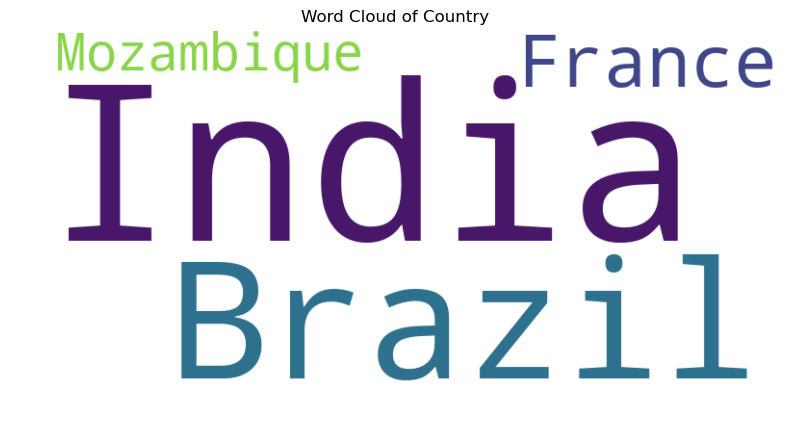

In [230]:
from wordcloud import WordCloud

text_data = ' '.join(superstore_data['Country'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Country')
plt.show()


#  Analysing the dataset

In [146]:
#  Analysing the dataset
print(superstore_data.describe())
print(superstore_data.info())
print(superstore_data.apply(lambda x: len(x.unique())))  


             Row ID     Quantity  Shipping Cost
count   5000.000000  5000.000000    5000.000000
mean   24058.613800     4.818600     130.142159
std    13267.278499     2.570022     115.675930
min       33.000000     1.000000       1.060000
25%    13793.500000     3.000000      72.995000
50%    23517.500000     4.000000      99.700000
75%    33646.250000     6.000000     160.742500
max    51284.000000    14.000000     923.630000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          5000 non-null   int64  
 1   Order ID        5000 non-null   object 
 2   Order Date      5000 non-null   object 
 3   Ship Date       5000 non-null   object 
 4   Ship Mode       5000 non-null   object 
 5   Customer ID     5000 non-null   object 
 6   Customer Name   5000 non-null   object 
 7   Segment         5000 non-null   object 
 8   City  

# Remove the '%' symbol from the 'Discount' column

In [147]:
# Remove the '%' symbol from the 'Discount' column
superstore_data['Discount'] = superstore_data['Discount'].str.replace('%', '', regex=True)

# Convert the 'Discount' column to a numerical format (e.g., float)
superstore_data['Discount'] = superstore_data['Discount'].astype(float)

# Now the 'Discount' column contains numeric values without the '%' symbol
print(superstore_data['Discount'])


0        0.0
1        0.0
2       10.0
3        0.0
4        0.0
        ... 
4995     0.0
4996     0.0
4997    20.0
4998     0.0
4999     0.0
Name: Discount, Length: 5000, dtype: float64


# checking unique values in dataset

In [148]:
# checking unique values in dataset
unique_order_ids = superstore_data['Order ID'].unique()
print(unique_order_ids)


['MX-2013-VF2171518-41591' 'IN-2013-BP1123058-41329'
 'IT-2014-EB1384045-41706' ... 'CA-2013-BF108023-41454'
 'MX-2012-YS2188093-41060' 'IN-2014-JA1597078-41802']


# Check for null values and print the count of null values for each column

In [149]:
# Check for null values and print the count of null values for each column
superstore_data=superstore.iloc[:10]
print(superstore_data.isnull().sum())
# Check the number of rows where 'Item_Visibility' is zero
print(sum(superstore_data['Sales'] == 0))



Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64
0


# creating new attributes

In [150]:
#creating new attributes
superstore_data=superstore.iloc[:10]
superstore_data.loc[superstore_data['Order Date'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'

# Check the updated value counts of 'Item_Fat_Content'
print(superstore_data['Order Date'].value_counts())


Order Date
11/13/2013    1
2/24/2013     1
3/8/2014      1
5/1/2015      1
12/18/2014    1
11/20/2015    1
10/27/2012    1
11/23/2014    1
6/13/2013     1
12/2/2014     1
Name: count, dtype: int64


In [151]:
#creating small values for higher accuracy in prediction
superstore_data=superstore.iloc[:10]
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])
superstore_data['Ship Date'] = pd.to_datetime(superstore_data['Ship Date'])
superstore_data['Year'] = superstore_data['Order Date'].dt.year
superstore_data['Month'] = superstore_data['Order Date'].dt.month
superstore_data['Day'] = superstore_data['Order Date'].dt.day
superstore_data


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month,Day
0,4132,MX-2013-VF2171518-41591,2013-11-13,2013-11-13,Same Day,VF-2171518,Vicky Freymann,Home Office,Toledo,Parana,...,"Harbour Creations Executive Leather Armchair, ...","$2,221.80",7,0%,$622.02,810.250,Critical,2013,11,13
1,22999,IN-2013-BP1123058-41329,2013-02-24,2013-02-24,Same Day,BP-1123058,Benjamin Patterson,Consumer,Surat,Gujarat,...,"Office Star Executive Leather Armchair, Red","$1,878.72",4,0%,$582.36,704.080,Critical,2013,2,24
2,13847,IT-2014-EB1384045-41706,2014-03-08,2014-03-08,Same Day,EB-1384045,Ellis Ballard,Corporate,Montreuil,Ile-de-France,...,"Office Star Executive Leather Armchair, Adjust...","$2,092.50",5,10%,$720.75,652.980,Critical,2014,3,8
3,28701,IN-2015-SW2027558-42125,2015-05-01,2015-05-01,Same Day,SW-2027558,Scott Williamson,Consumer,Jamshedpur,Jharkhand,...,"Konica Inkjet, White","$2,174.13",7,0%,$500.01,637.860,Critical,2015,5,1
4,42336,MZ-2014-DG330087-41991,2014-12-18,2014-12-18,Same Day,DG-330087,Deirdre Greer,Corporate,Maputo,Cidade De Maputo,...,"Motorola Smart Phone, with Caller ID","$2,582.16",4,0%,$593.88,627.170,High,2014,12,18
5,8029,MX-2015-EM1420082-42328,2015-11-20,2015-11-20,Same Day,EM-1420082,Evan Minnotte,Home Office,Gómez Palacio,Durango,...,"Samsung Smart Phone, Cordless","$1,704.00",4,0%,$119.28,592.726,Critical,2015,11,20
6,30199,IN-2012-RM1937558-41209,2012-10-27,2012-10-27,Same Day,RM-1937558,Raymond Messe,Consumer,Naihati,West Bengal,...,"Novimex Executive Leather Armchair, Red","$2,301.00",5,0%,$91.95,573.270,Critical,2012,10,27
7,45616,MO-2014-AB25586-41966,2014-11-23,2014-11-23,Same Day,AB-25586,Alejandro Ballentine,Home Office,Casablanca,Grand Casablanca,...,"Hoover Stove, White","$2,266.44",4,0%,$113.28,556.450,Medium,2014,11,23
8,25026,IN-2013-RP192707-41438,2013-06-13,2013-06-13,Same Day,RP-192707,Rachel Payne,Corporate,Sydney,New South Wales,...,"Brother Wireless Fax, Laser","$3,068.36",9,10%,"$1,124.90",555.770,High,2013,6,13
9,19195,ES-2014-NZ1856545-41975,2014-12-02,2014-12-02,Same Day,NZ-1856545,Nick Zandusky,Home Office,Paris,Ile-de-France,...,"Hamilton Beach Stove, White","$2,432.16",5,10%,$513.36,546.900,Critical,2014,12,2


   Row ID                 Order ID  Order Date   Ship Date Ship Mode  \
0    4132  MX-2013-VF2171518-41591  11/13/2013  11/13/2013  Same Day   
1   22999  IN-2013-BP1123058-41329   2/24/2013   2/24/2013  Same Day   
2   13847  IT-2014-EB1384045-41706    3/8/2014    3/8/2014  Same Day   
3   28701  IN-2015-SW2027558-42125    5/1/2015    5/1/2015  Same Day   
4   42336   MZ-2014-DG330087-41991  12/18/2014  12/18/2014  Same Day   

  Customer ID       Customer Name      Segment        City             State  \
0  VF-2171518      Vicky Freymann  Home Office      Toledo            Parana   
1  BP-1123058  Benjamin Patterson     Consumer       Surat           Gujarat   
2  EB-1384045       Ellis Ballard    Corporate   Montreuil     Ile-de-France   
3  SW-2027558    Scott Williamson     Consumer  Jamshedpur         Jharkhand   
4   DG-330087       Deirdre Greer    Corporate      Maputo  Cidade De Maputo   

   ...   Product ID    Category Sub-Category  \
0  ...  FUR-CH-4530   Furniture       

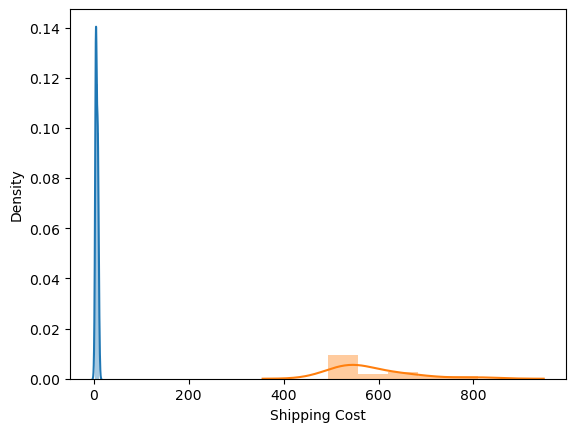

<Figure size 2000x500 with 0 Axes>

In [152]:
#Exploratory Data Analysis
superstore_data=superstore.iloc[:17]
print(superstore_data.head())

sb.distplot(superstore_data['Quantity'])
sb.distplot(superstore_data['Shipping Cost'])
plt.figure(figsize=(20,5))
plt.show()

# Normalization

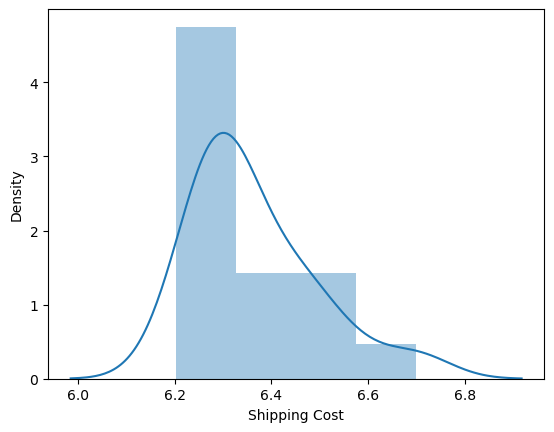

In [153]:
#Normalization
#log transformation
superstore_data['Shipping Cost'] = np.log(1 + superstore_data['Shipping Cost'])
sb.distplot(superstore_data['Shipping Cost'])
plt.show()



## # Create a heatmap of the correlation matrix

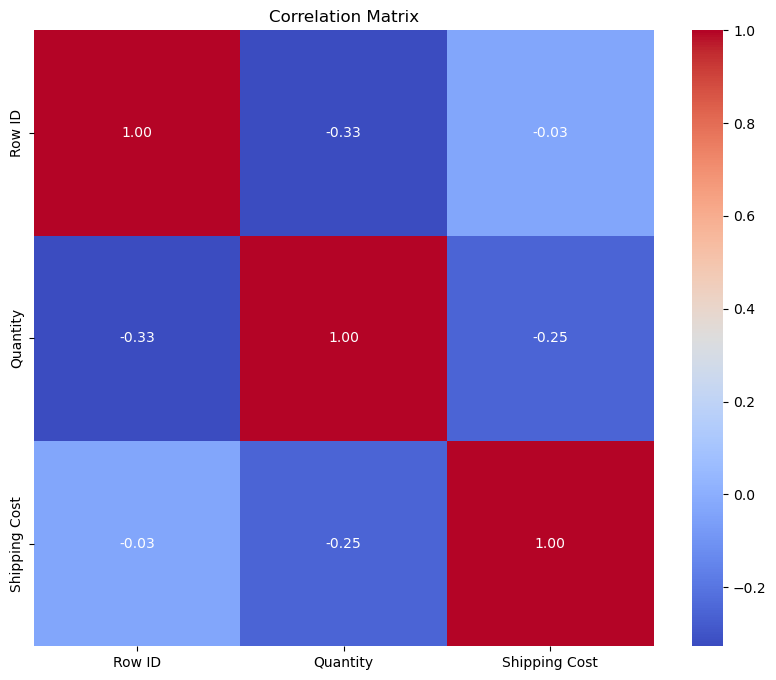

In [156]:
# Select only numeric columns
numeric_data = superstore_data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## Numeric data print only 10

In [157]:
numeric_data.head(10)

,Row ID,Quantity,Shipping Cost
0,4132,7,6.698576
1,22999,4,6.558311
2,13847,5,6.483077
3,28701,7,6.459685
4,42336,4,6.442811
5,8029,4,6.386418
6,30199,5,6.353100
7,45616,4,6.323373
8,25026,9,6.322152
9,19195,5,6.306093


## # Select the numerical columns you want to create box plots for

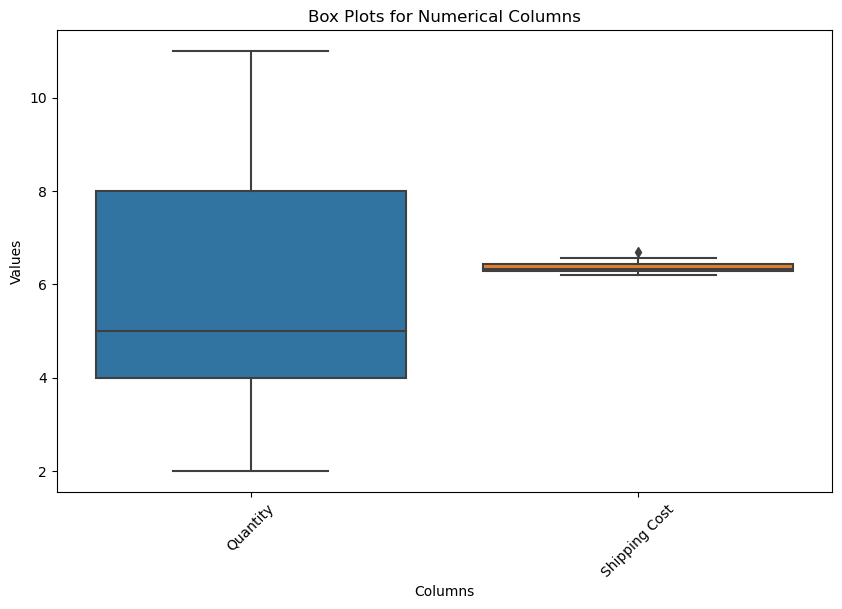

In [158]:
# Select the numerical columns you want to create box plots for

numerical_columns = ['Quantity', 'Shipping Cost']

# Create box plots for the selected numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_data[numerical_columns])
plt.title('Box Plots for Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the box plots
plt.show()


# Specify the numerical column for which you want to create a histogram

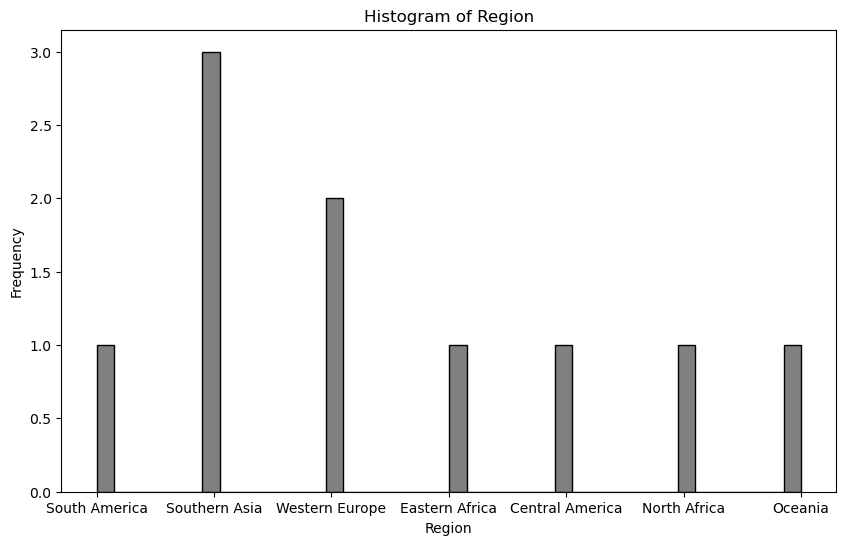

In [159]:
# Specify the numerical column for which you want to create a histogram
superstore_data=superstore.iloc[:10]
numerical_column = 'Region'  # Change this to the desired column

# Check if the specified column exists in the DataFrame
if numerical_column in superstore_data.columns:
    # Create a histogram
    plt.figure(figsize=(10, 6))
    plt.hist(superstore_data[numerical_column], bins=40, color='gray', edgecolor='black')
    plt.title(f'Histogram of {numerical_column}')
    plt.xlabel(numerical_column)
    plt.ylabel('Frequency')

    # Show the histogram
    plt.show()
else:
    print(f"Column '{numerical_column}' not found in the dataset.")


# Create a scatter plot

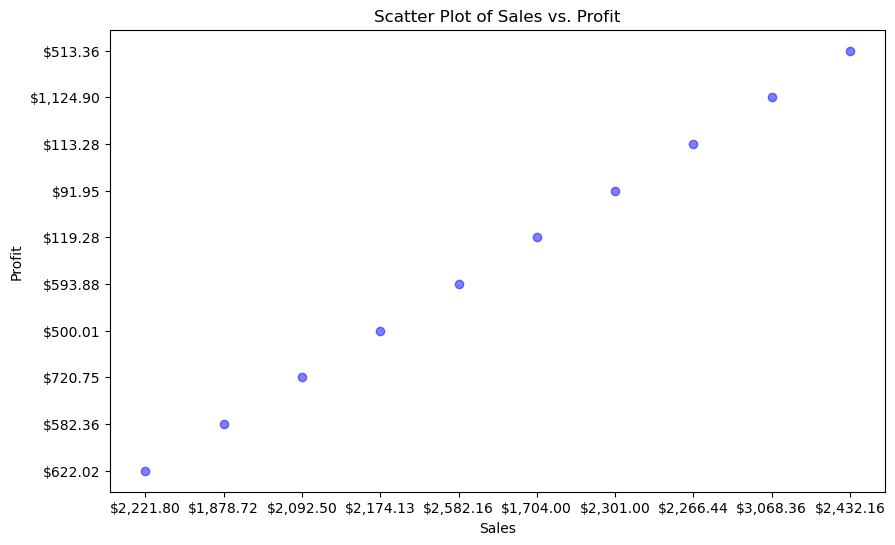

In [160]:
# Select the two numerical columns for which you want to create a scatter plot
superstore_data=superstore.iloc[:10]
x_column = 'Sales'
y_column = 'Profit'

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(superstore_data[x_column], superstore_data[y_column], c='blue', alpha=0.5)
plt.title(f'Scatter Plot of {x_column} vs. {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)

# Show the scatter plot02/
plt.show()


# Create a scatter plot of Sales by Profit

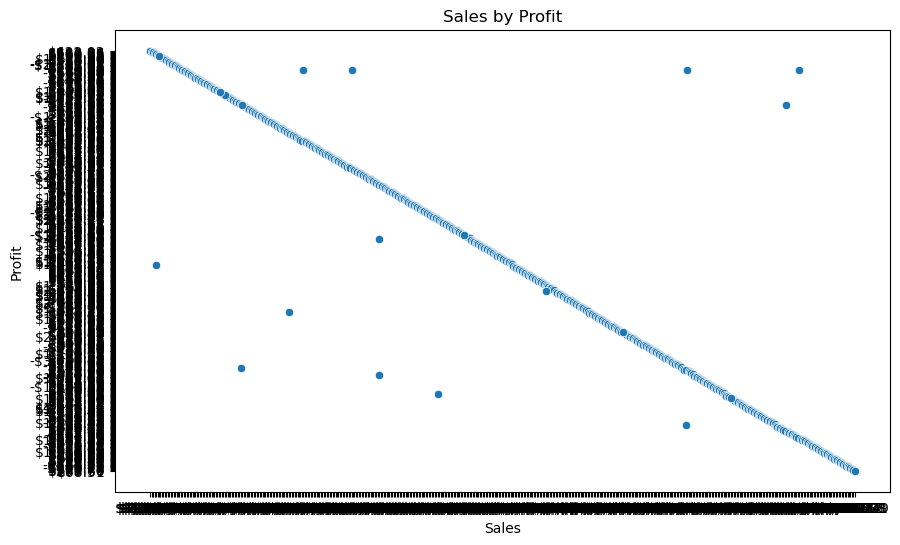

In [161]:
# Create a scatter plot of Sales by Profit
superstore_data=superstore.iloc[:500]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=superstore_data, x='Sales', y='Profit')
plt.title('Sales by Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Show the plot
plt.show()


# Create a scatter plot of Market vs. Sales, color-coded by Profit

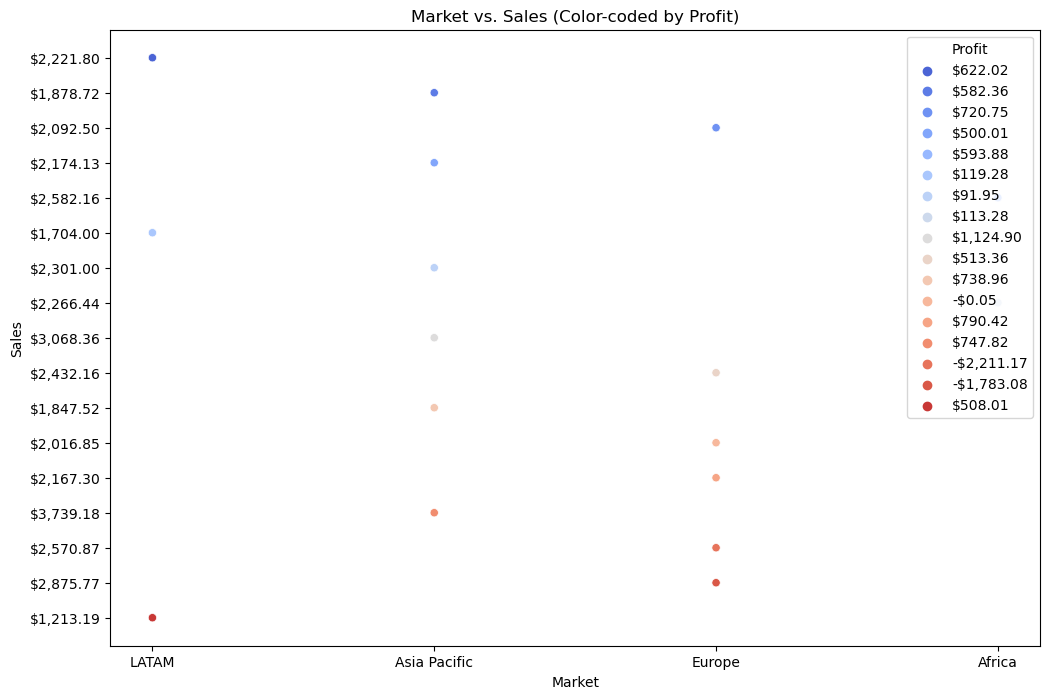

In [162]:
# Create a scatter plot of Market vs. Sales, color-coded by Profit
superstore_data=superstore.iloc[:17]
plt.figure(figsize=(12, 8))
sns.scatterplot(data=superstore_data, x='Market', y='Sales', hue='Profit', palette='coolwarm')
plt.title('Market vs. Sales (Color-coded by Profit)')
plt.xlabel('Market')
plt.ylabel('Sales')

# Show the plot
plt.legend(loc='upper right', title='Profit')
plt.show()


## # Create a line plot for sales-wise profits

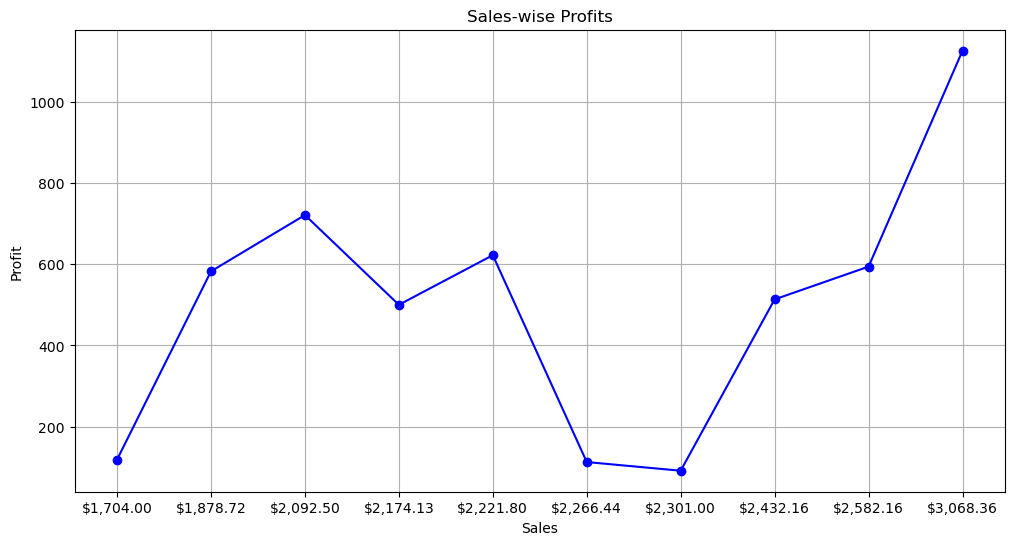

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
superstore_data = pd.read_csv('C:/Users/stmro/Desktop/notebook/Data.csv')
superstore_data=superstore.iloc[:10]
# Convert the 'Profit' column to a numeric format
superstore_data['Profit'] = superstore_data['Profit'].str.replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'Sales' and calculate the mean profit for each sales level
sales_profit_data = superstore_data.groupby('Sales')['Profit'].mean().reset_index()

# Create a line plot for sales-wise profits
plt.figure(figsize=(12, 6))
plt.plot(sales_profit_data['Sales'], sales_profit_data['Profit'], marker='o', linestyle='-', color='b')
plt.title('Sales-wise Profits')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid()

# Show the plot
plt.show()


## # Print the total number of returns

In [163]:
# Filter the data to get only the rows where there are returns
returns_data = superstore_data[superstore_data['Order ID'].str.contains('Return')]

# Calculate the total number of returns
total_returns = len(returns_data)

# Print the total number of returns
print(f'Total Number of Returns: {total_returns}')


Total Number of Returns: 0


## # Number of days with closed stores

In [164]:
# Number of days with closed stores
superstore_data[(superstore_data.Quantity == 10)].shape[0]

0

## # Create a pie chart Category Wise

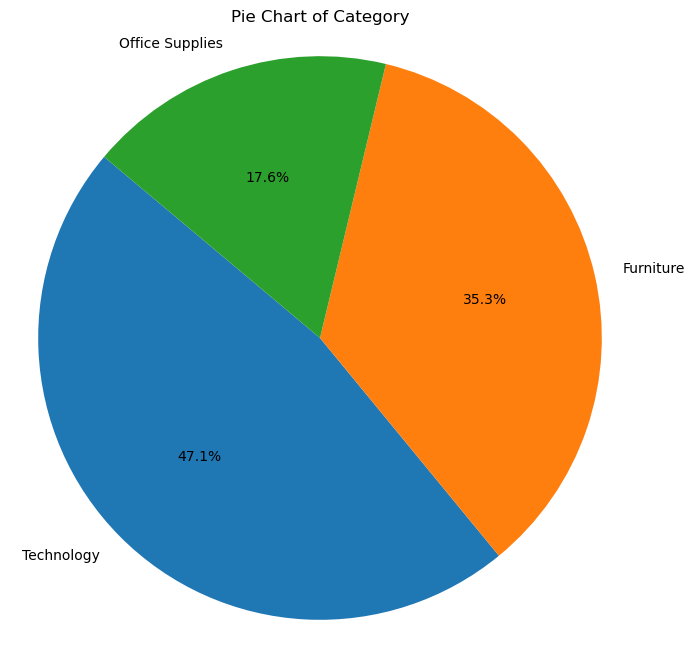

In [165]:
superstore_data=superstore.iloc[:17]
# Choose a categorical column from your dataset to create a pie chart (e.g., 'Category')
categorical_column = 'Category'  

# Count the frequency of each category
category_counts = superstore_data[categorical_column].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_column}')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Show the pie chart
plt.show()


## # Create a pie chart Country Wise

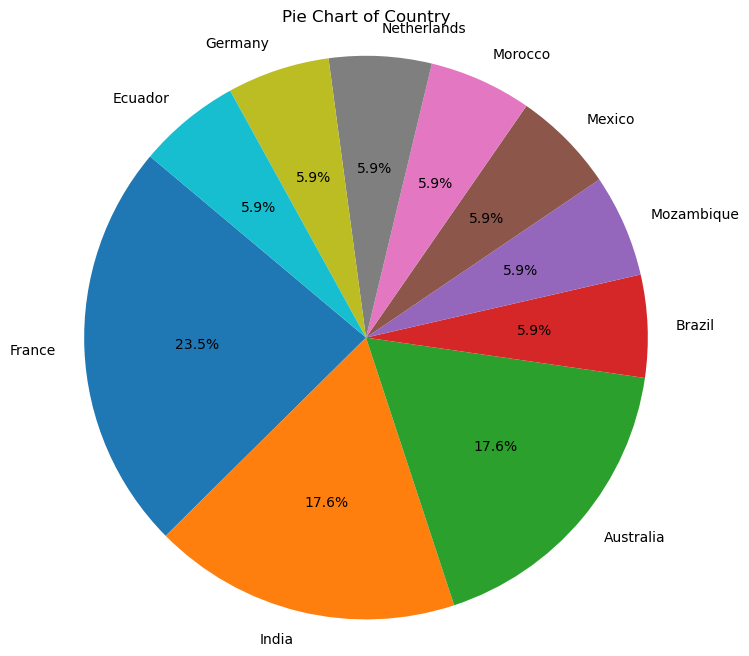

In [166]:
superstore_data=superstore.iloc[:17]
# Choose a categorical column from your dataset to create a pie chart (e.g., 'Category')
categorical_column = 'Country'  # Replace with the column you want to visualize

# Count the frequency of each category
category_counts = superstore_data[categorical_column].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_column}')
plt.axis('equal')

# Show the pie chart
plt.show()


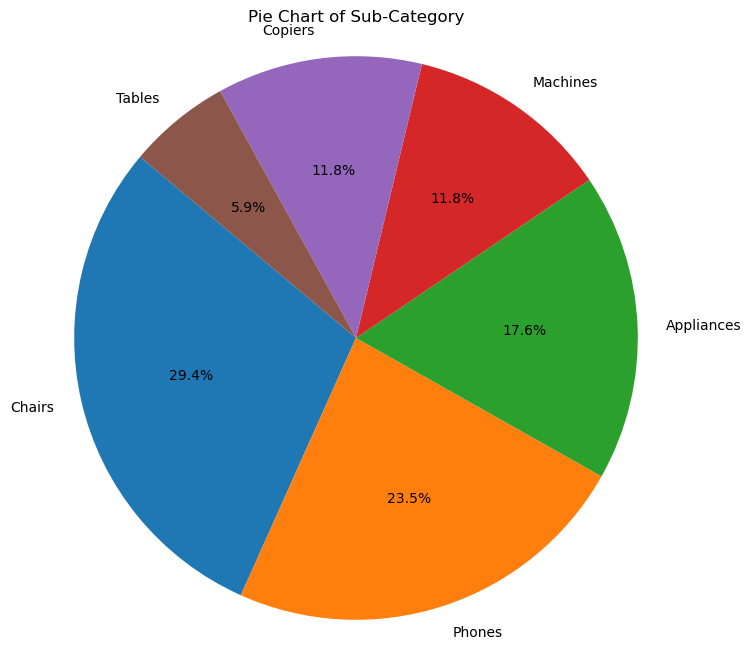

In [167]:
superstore_data=superstore.iloc[:17]
# Choose a categorical column from your dataset to create a pie chart (e.g., 'Category')
categorical_column = 'Sub-Category'  # Replace with the column you want to visualize

# Count the frequency of each category
category_counts = superstore_data[categorical_column].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_column}')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Show the pie chart
plt.show()


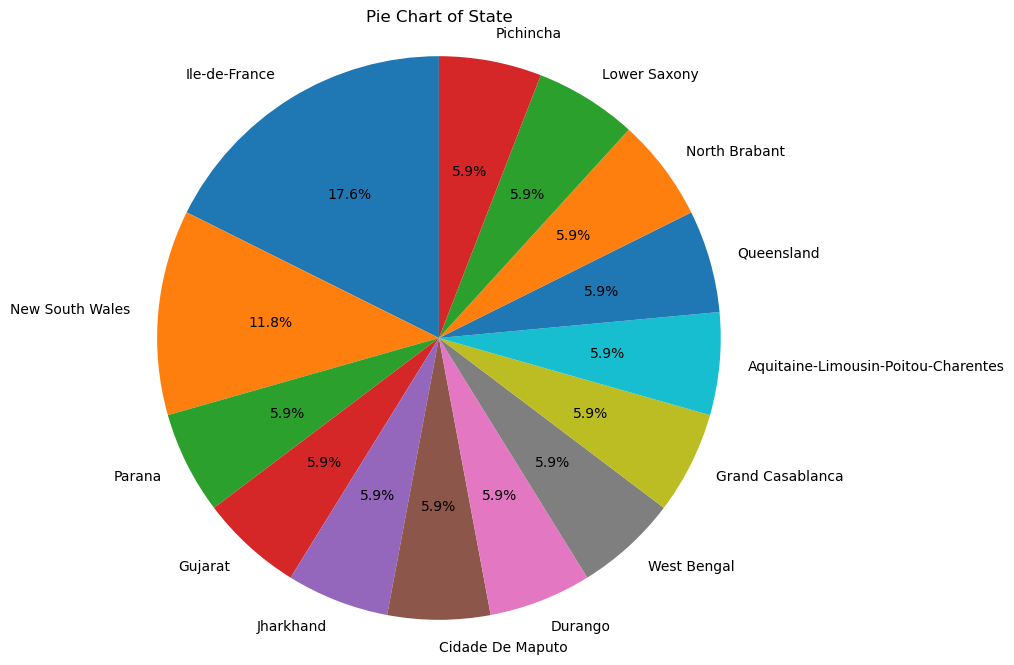

In [168]:
superstore_data=superstore.iloc[:17]
# Choose a categorical column from your dataset to create a pie chart (e.g., 'Category')
categorical_column = 'State'  # Replace with the column you want to visualize

# Count the frequency of each category
category_counts = superstore_data[categorical_column].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Pie Chart of {categorical_column}')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Show the pie chart
plt.show()


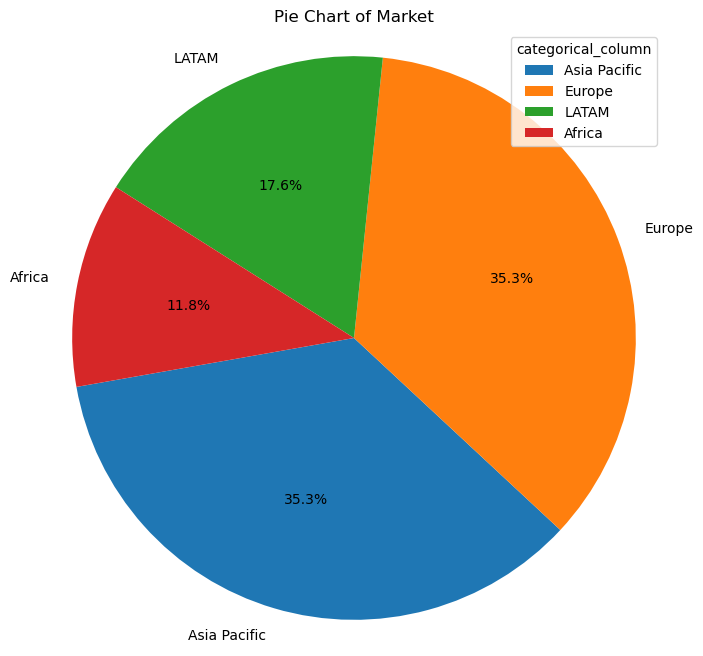

In [169]:
superstore_data=superstore.iloc[:17]
# Choose a categorical column from your dataset to create a pie chart (e.g., 'Category')
categorical_column = 'Market'  # Replace with the column you want to visualize

# Count the frequency of each category
category_counts = superstore_data[categorical_column].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=190)
plt.title(f'Pie Chart of {categorical_column}')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Show the pie chart
plt.legend(title="categorical_column")
plt.show()


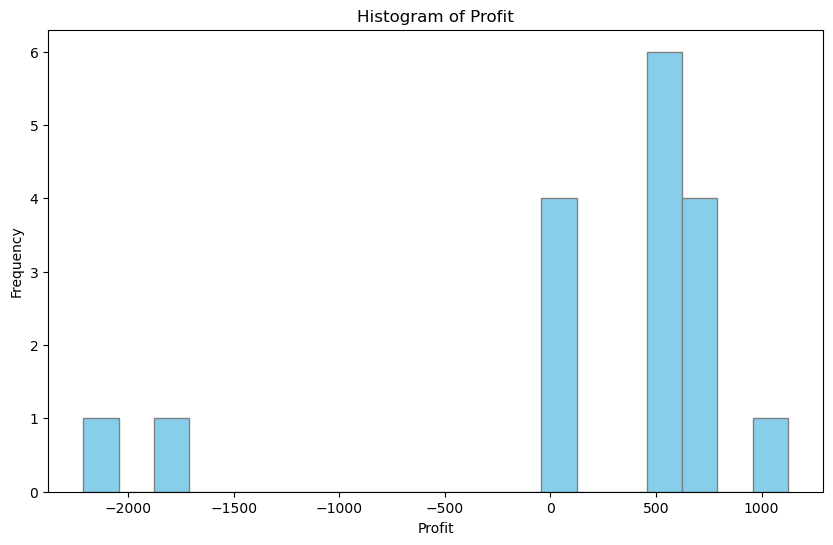

In [170]:
# Choose the numerical column you want to create a histogram for (e.g., 'Sales')
superstore_data=superstore.iloc[:17]
numerical_column = 'Profit'  # Replace with the column you want to visualize

# Convert the 'Sales' column to a numerical format (e.g., float)
superstore_data[numerical_column] = superstore_data[numerical_column].str.replace('[\$,]', '', regex=True).astype(float)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(superstore_data[numerical_column], bins=20, color='skyblue', edgecolor='gray')
plt.title(f'Histogram of {numerical_column}')
plt.xlabel(numerical_column)
plt.ylabel('Frequency')

# Show the histogram
plt.show()


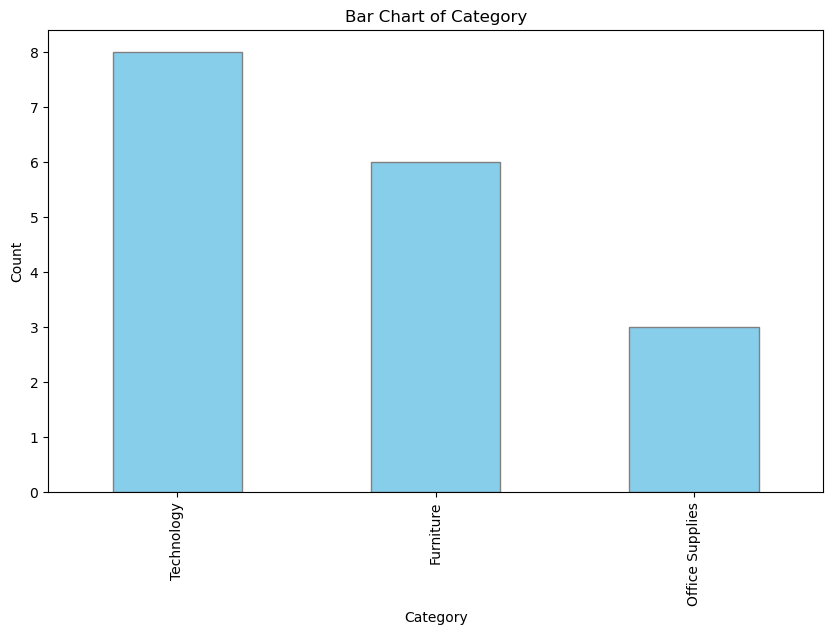

In [171]:
# Choose a categorical column from your dataset (e.g., 'Category')
categorical_column = 'Category'  # Replace with the column you want to visualize

# Count the occurrences of each category
category_counts = superstore_data[categorical_column].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='gray')
plt.title(f'Bar Chart of {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel('Count')

# Show the bar chart
plt.show()


## Choose a categorical column from your dataset (e.g., 'Category')

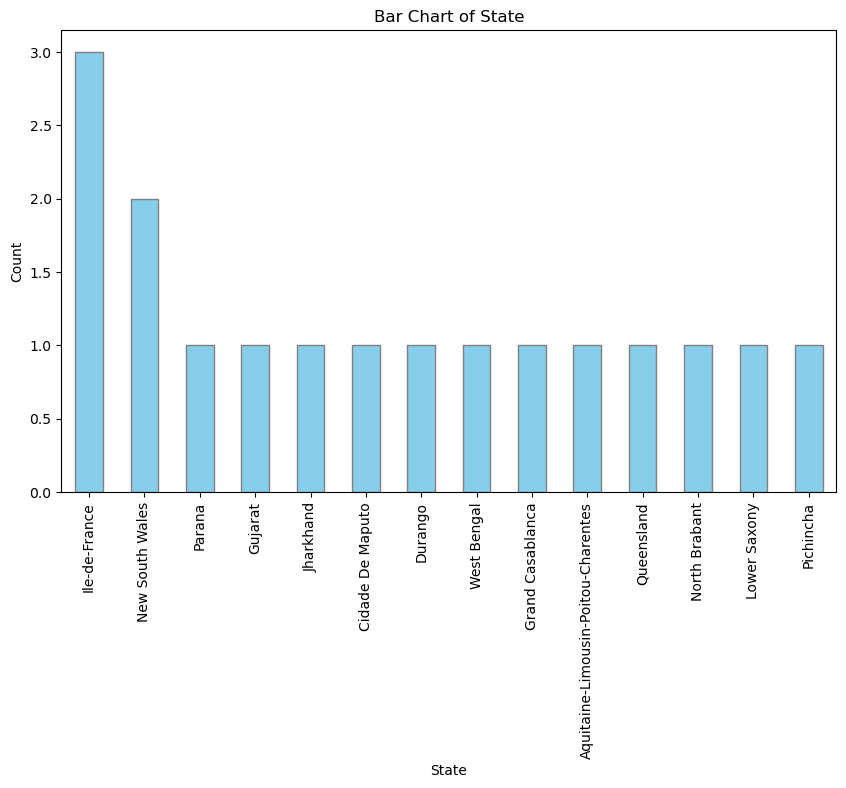

In [172]:
# Choose a categorical column from your dataset (e.g., 'Category')
categorical_column = 'State'  # Replace with the column you want to visualize

# Count the occurrences of each category
category_counts = superstore_data[categorical_column].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='gray')
plt.title(f'Bar Chart of {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel('Count')

# Show the bar chart
plt.show()


## Filter the data for India

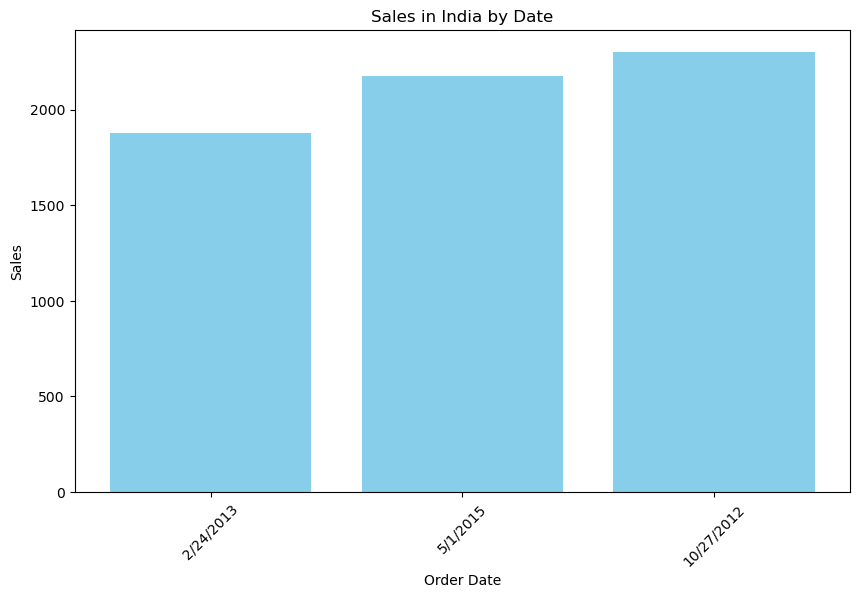

In [173]:
# Filter the data for India
india_sales_data = superstore_data[superstore_data['Country'] == 'India']

# Choose a numerical column for sales (e.g., 'Sales')
numerical_column = 'Sales'  # Replace with the column you want to visualize

# Convert the 'Sales' column to a numerical format (e.g., float)
india_sales_data[numerical_column] = india_sales_data[numerical_column].str.replace('[\$,]', '', regex=True).astype(float)

# Create a bar chart for sales in India
plt.figure(figsize=(10, 6))
plt.bar(india_sales_data['Order Date'], india_sales_data[numerical_column], color='skyblue')
plt.title(f'Sales in India by Date')
plt.xlabel('Order Date')
plt.ylabel(numerical_column)

# Show the bar chart
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## Create a bar chart for sales in India by State

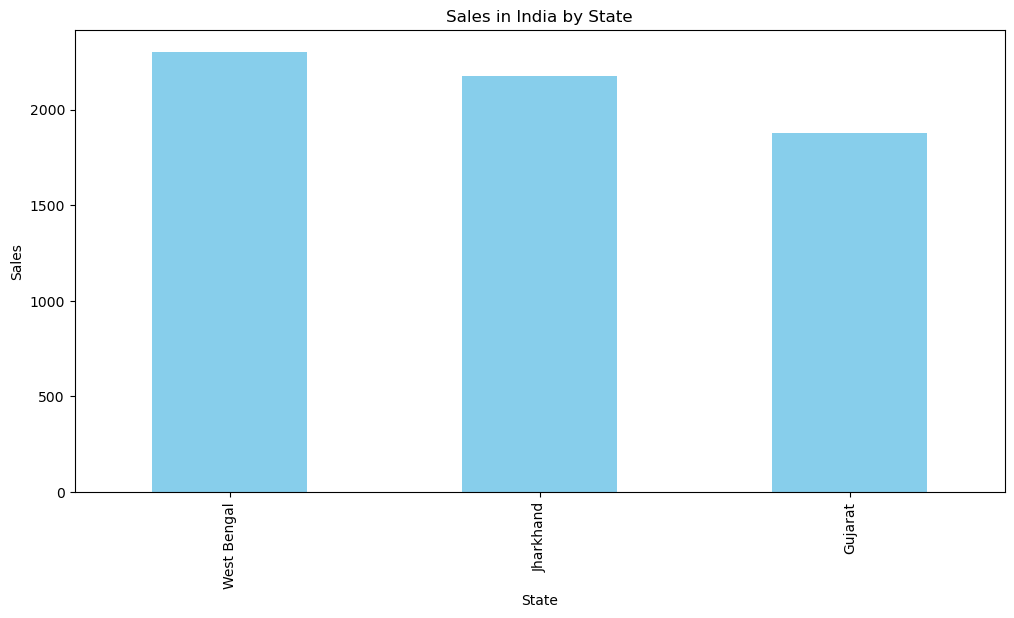

In [174]:
# Create a bar chart for sales in India by State
plt.figure(figsize=(12, 6))
state_sales_data = india_sales_data.groupby('State')[numerical_column].sum()
state_sales_data.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title(f'Sales in India by State')
plt.xlabel('State')
plt.ylabel(numerical_column)

# Show the bar chart
plt.show()


## Create a bar chart for city-wise sales in India

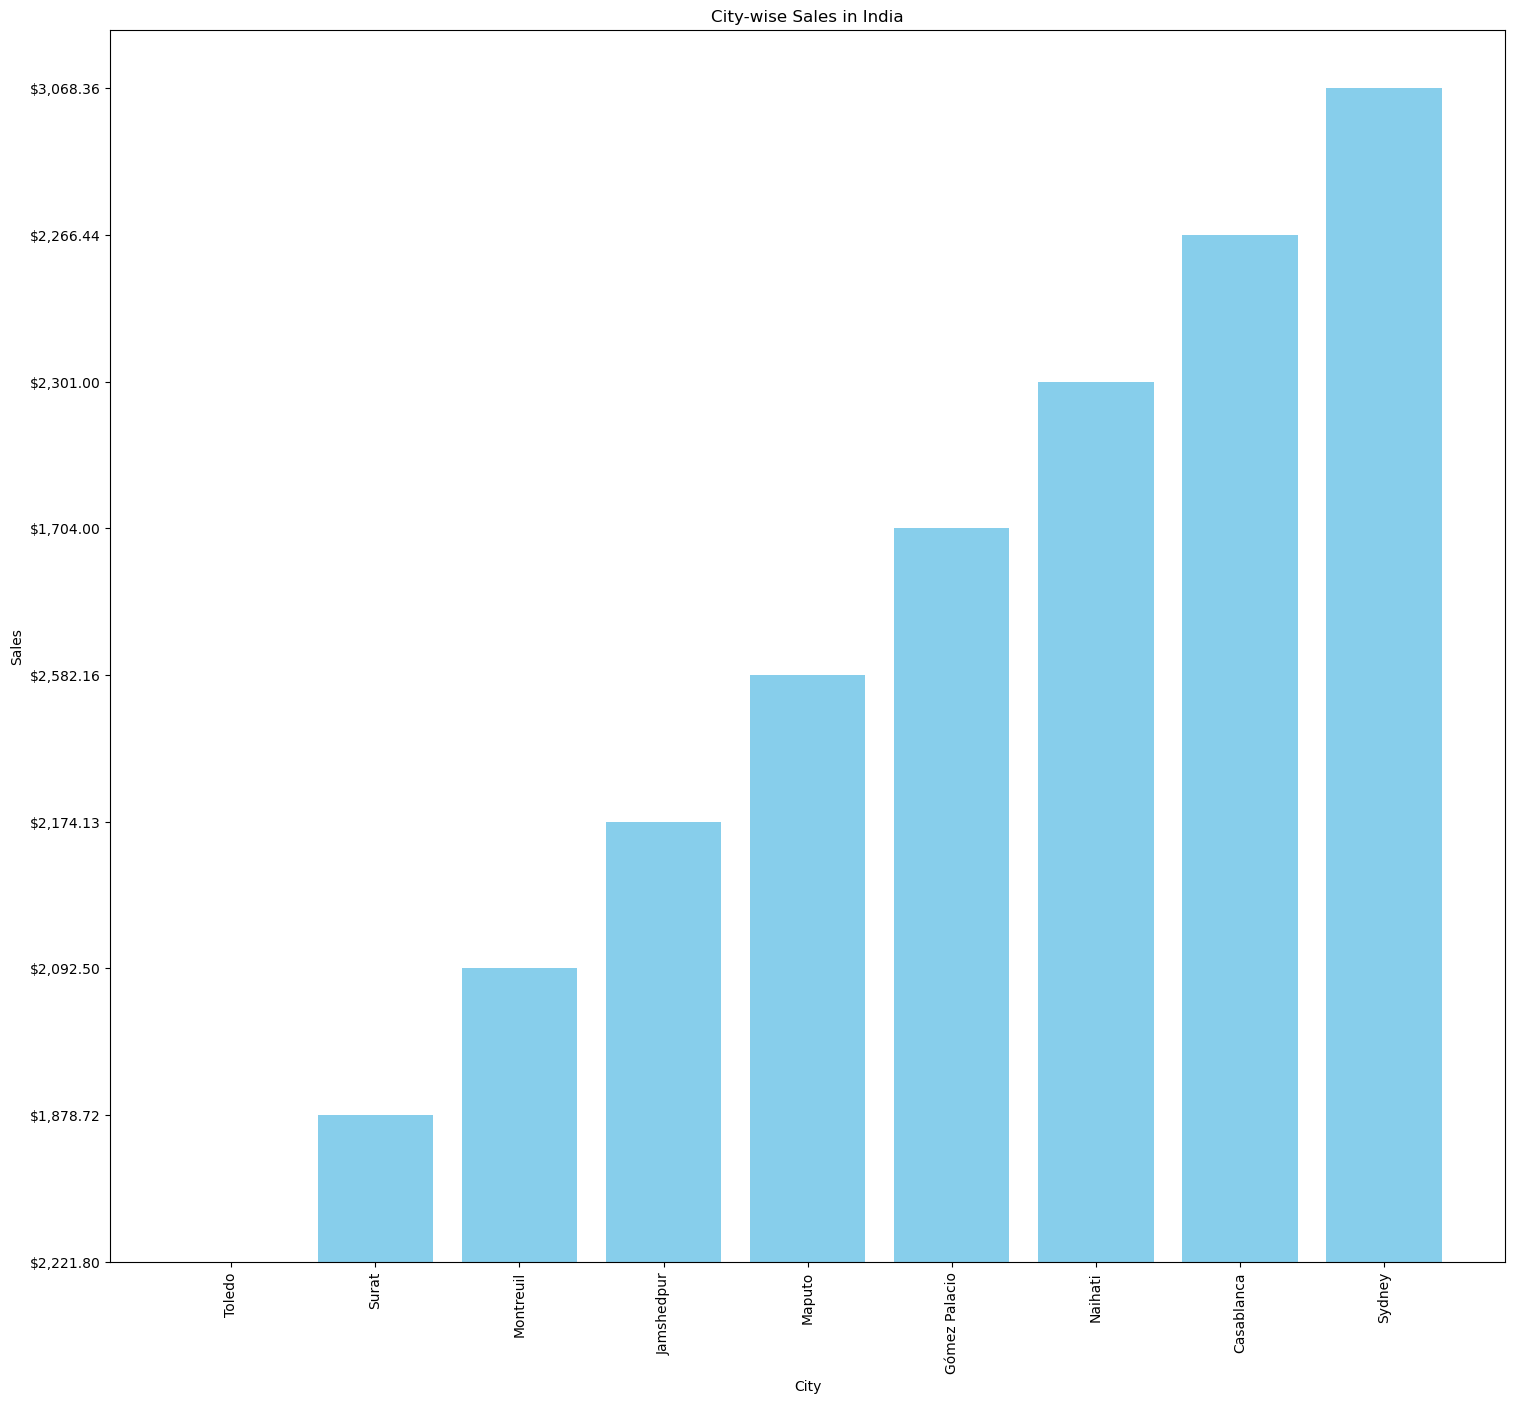

In [175]:
# Create a bar chart for city-wise sales in India
plt.figure(figsize=(18, 16))
superstore_data=superstore.iloc[:9]
plt.bar(superstore_data['City'], superstore_data[numerical_column], color='skyblue')
plt.title('City-wise Sales in India')
plt.xlabel('City')
plt.ylabel(numerical_column)

# Customize the plot for better readability (e.g., rotation of x-axis labels)
plt.xticks(rotation=90)

# Show the bar chart
plt.show()


# Group the filtered data by 'City' and 'Customer Name' and calculate the total sales


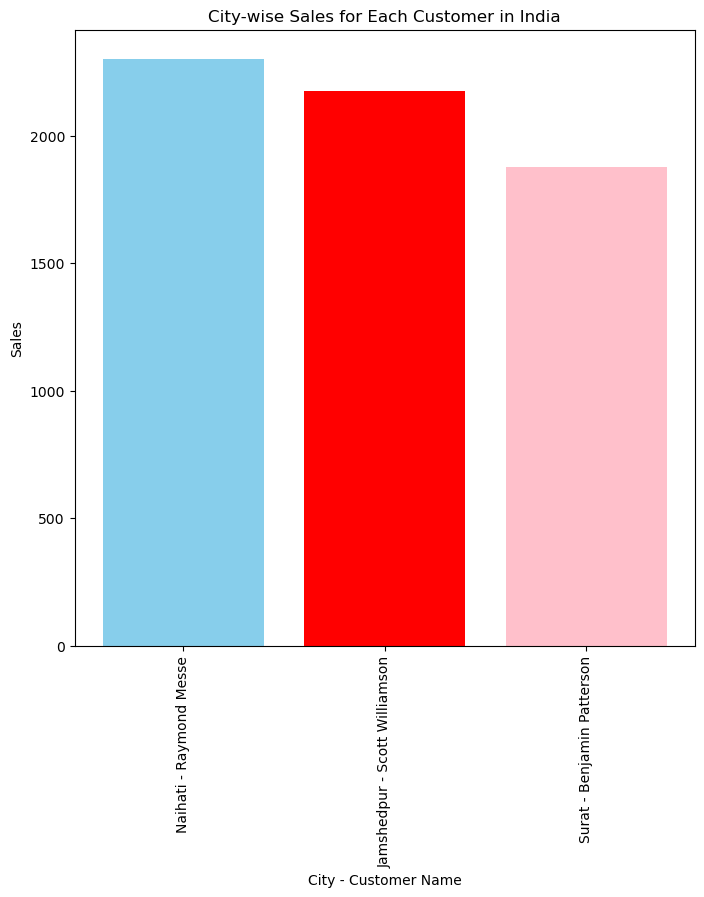

In [176]:
# Group the filtered data by 'City' and 'Customer Name' and calculate the total sales
city_customer_sales_data = india_sales_data.groupby(['City', 'Customer Name'])[numerical_column].sum().reset_index()

# Sort the data by total sales in descending order
city_customer_sales_data = city_customer_sales_data.sort_values(by=numerical_column, ascending=False)

# Create a bar chart for city-wise sales for each customer name in India
plt.figure(figsize=(8, 8))
plt.bar(city_customer_sales_data['City'] + ' - ' + city_customer_sales_data['Customer Name'],
        city_customer_sales_data[numerical_column], color=['skyblue','red','pink'])
plt.title('City-wise Sales for Each Customer in India')
plt.xlabel('City - Customer Name')
plt.ylabel(numerical_column)

# Customize the plot for better readability (e.g., rotation of x-axis labels)
plt.xticks(rotation=90)

# Show the bar chart
plt.show()


# Create a bar chart for market-wise sales in India, grouped by state

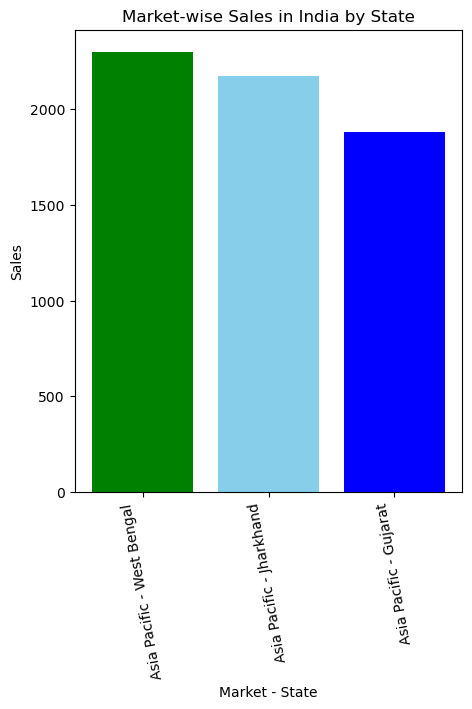

In [177]:
# Filter the data for India
india_sales_data = superstore_data[superstore_data['Country'] == 'India']

# Choose a numerical column for sales (e.g., 'Sales')
numerical_column = 'Sales'  # Replace with the column you want to visualize

# Convert the 'Sales' column to a numerical format (e.g., float)
india_sales_data[numerical_column] = india_sales_data[numerical_column].str.replace('[\$,]', '', regex=True)
india_sales_data[numerical_column] = pd.to_numeric(india_sales_data[numerical_column], errors='coerce')

# Filter out rows with NaN values in the 'Sales' column
india_sales_data = india_sales_data.dropna(subset=[numerical_column])

# Group the filtered data by 'Market' and 'State' and calculate the total sales
market_state_sales_data = india_sales_data.groupby(['Market', 'State'])[numerical_column].sum().reset_index()

# Sort the data by total sales in descending order
market_state_sales_data = market_state_sales_data.sort_values(by=numerical_column, ascending=False)

# Create a bar chart for market-wise sales in India, grouped by state
plt.figure(figsize=(5, 6))
plt.bar(market_state_sales_data['Market'] + ' - ' + market_state_sales_data['State'],
        market_state_sales_data[numerical_column], color=['green','skyblue','blue'])
plt.title('Market-wise Sales in India by State')
plt.xlabel('Market - State')
plt.ylabel(numerical_column)

# Customize the plot for better readability (e.g., rotation of x-axis labels)
plt.xticks(rotation=100)

# Show the bar chart
plt.show()


# Visualize the decision tree regression line and Decision Tree Regression data

Linear Regression Results:
Mean Squared Error: 28891.66
R-squared: 0.06

Decision Tree Regression Results:
Mean Squared Error: 44628.88


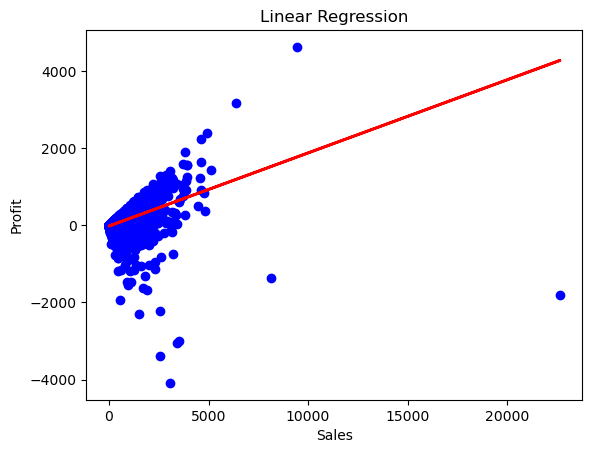

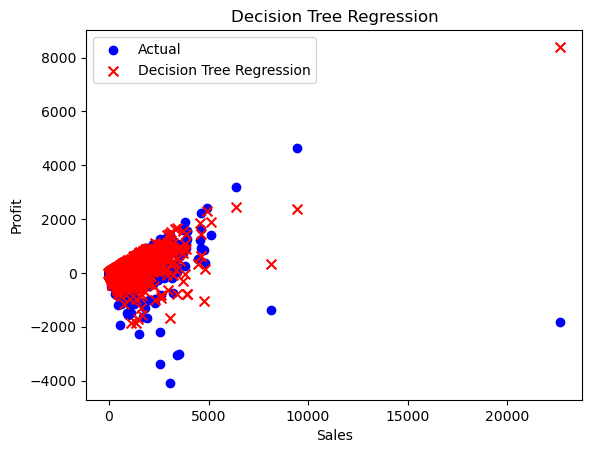

In [203]:
# Load your dataset into a DataFrame
superstore_data = pd.read_csv('C:/Users/stmro/Desktop/notebook/Data.csv')
#superstore_data=superstore.iloc[:250]
# Choose the relevant columns for the analysis
independent_variable = 'Sales'  # Replace with the actual independent variable column
dependent_variable = 'Profit'  # Replace with the actual dependent variable column

# Convert the columns to the required data types
superstore_data[independent_variable] = superstore_data[independent_variable].str.replace('[\$,]', '', regex=True).astype(float)
superstore_data[dependent_variable] = superstore_data[dependent_variable].str.replace('[\$,]', '', regex=True).astype(float)

# Remove rows with missing values
superstore_data = superstore_data.dropna(subset=[independent_variable, dependent_variable])

# Split the data into training and testing sets for linear regression
X = superstore_data[[independent_variable]]
y = superstore_data[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data for linear regression
y_pred_linear = linear_model.predict(X_test)

# Calculate the Mean Squared Error and R-squared for linear regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print linear regression results
print("Linear Regression Results:")
print(f'Mean Squared Error: {mse_linear:.2f}')
print(f'R-squared: {r2_linear:.2f}')

# Visualize the linear regression line and data points
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)

# Split the data into training and testing sets for decision tree regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a DecisionTreeRegressor model
decision_tree_model = DecisionTreeRegressor()

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data for decision tree regression
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calculate the Mean Squared Error for decision tree regression
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)

# Print decision tree regression results
print("\nDecision Tree Regression Results:")
print(f'Mean Squared Error: {mse_decision_tree:.2f}')

# Visualize the decision tree regression line and data points
plt.figure()
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_decision_tree, color='red', marker='x', s=50, label='Decision Tree Regression')
plt.title('Decision Tree Regression')
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)

# Show the plots
plt.legend()
plt.show()


# Create a bar plot with the specified palette

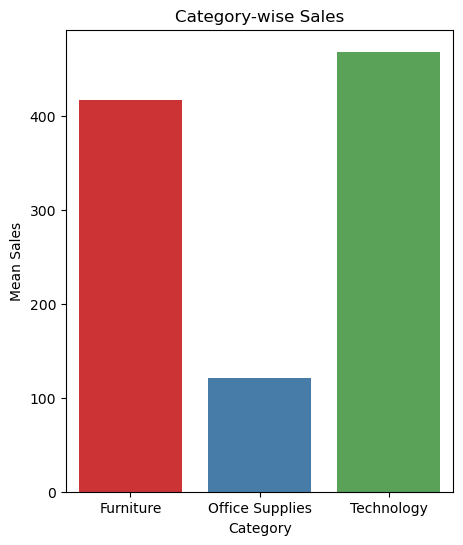

In [204]:
# Load your dataset into a DataFrame
superstore_data = pd.read_csv('C:/Users/stmro/Desktop/notebook/Data.csv')
# superstore_data = superstore_data.iloc[:250]
superstore_data['Sales'] = superstore_data['Sales'].str.replace('[\$,]', '', regex=True).astype(float)
superstore_data['Profit'] = superstore_data['Profit'].str.replace('[\$,]', '', regex=True).astype(float)

# Group the data by a categorical column (e.g., 'Category') and calculate the mean of a numerical column (e.g., 'Sales')
category_sales_mean = superstore_data.groupby('Category')['Sales'].mean().reset_index()

# Specify a custom color palette
custom_palette = sns.color_palette("Set1")  # Replace with the palette of your choice

# Create a bar plot with the specified palette
plt.figure(figsize=(5, 6))
sns.barplot(data=category_sales_mean, x='Category', y='Sales', palette=custom_palette)
plt.title('Category-wise Sales')
plt.xlabel('Category')
plt.ylabel('Mean Sales')

# Show the plot
plt.show()


## Create the barplot using your dataset

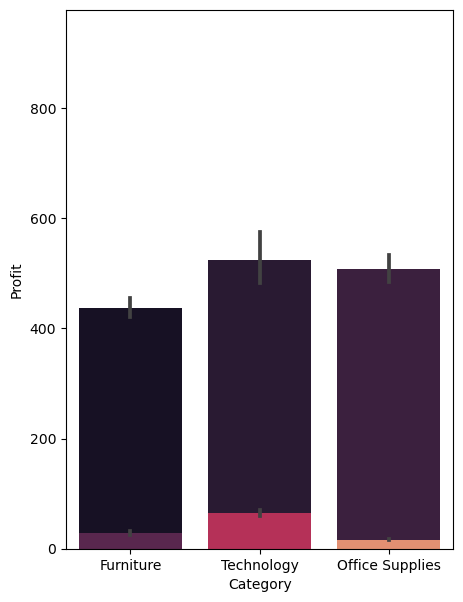

In [205]:
# Create the barplot using your dataset
plt.figure(figsize=(5, 7))
sns.barplot(x='Sub-Category', y='Sales', data=superstore_data, palette='rocket')
sns.barplot(x='Category', y='Profit', data=superstore_data, palette='rocket')
plt.show()


# Create a bar plot to visualize the means of 'Sales' by 'Category'

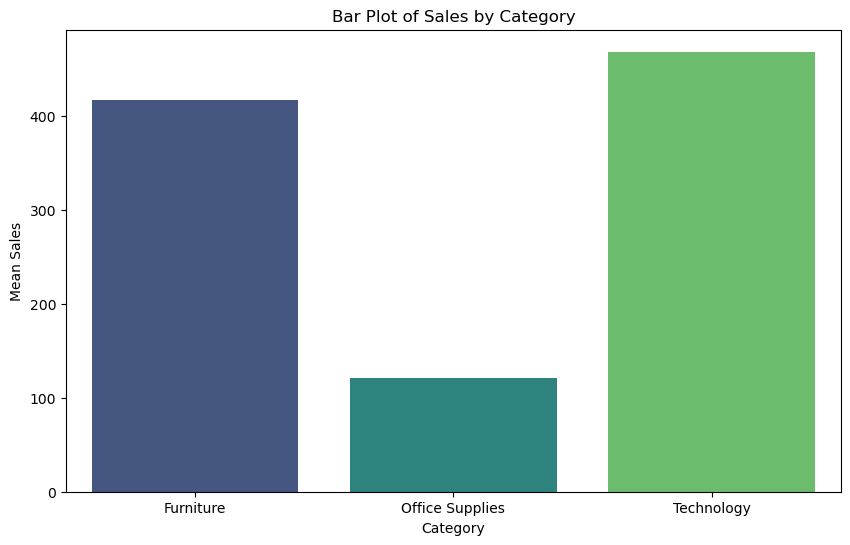

In [206]:
# Group the data by a categorical variable (e.g., 'Category') and calculate the mean of a numeric variable (e.g., 'Sales')
category_sales_mean = superstore_data.groupby('Category')['Sales'].mean().reset_index()

# Create a bar plot to visualize the means of 'Sales' by 'Category'
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=category_sales_mean, palette='viridis')
plt.title('Bar Plot of Sales by Category')
plt.xlabel('Category')
plt.ylabel('Mean Sales')

# Show the plot
plt.show()


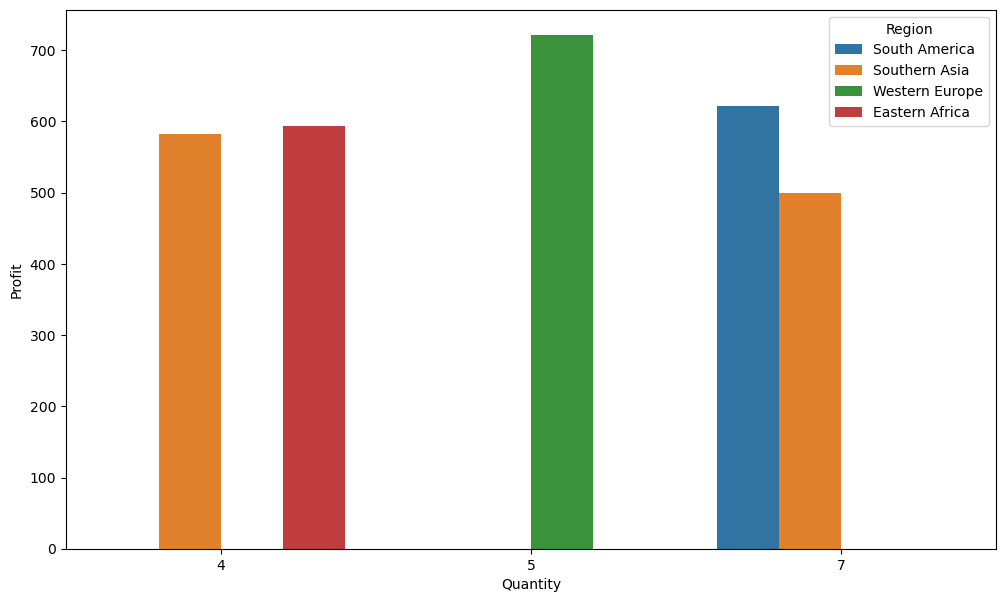

In [207]:
superstore_data = superstore_data.iloc[:5]
pl.figure(figsize=(12, 7))
sns.barplot(x='Quantity', y='Profit', data=superstore_data, hue='Region')

pl.show()


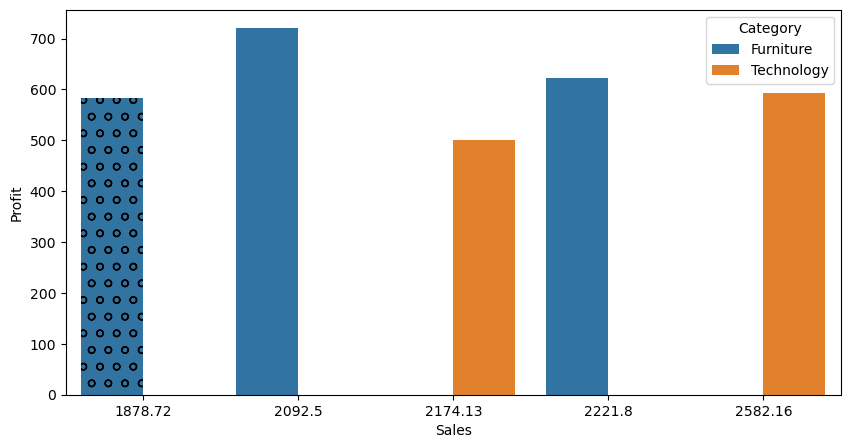

In [208]:
plt.figure(figsize=(10, 5))

# Customize the style and markers
sns.barplot(x='Sales', y='Profit', data=superstore_data, hue='Category', ci=None)

# Customize the appearance of the bars
for bar, marker in zip(plt.gca().patches, ['o', 's', 'D']):
    bar.set_hatch(marker)

plt.show()


## Scatter Plot - Visualize the relationship between two numerical variables:

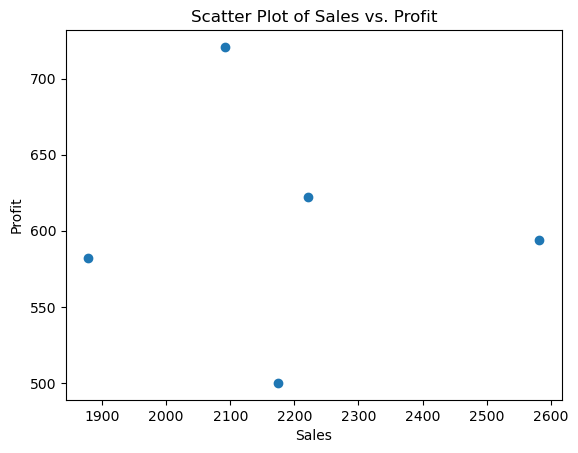

In [209]:
import matplotlib.pyplot as plt
plt.scatter(superstore_data['Sales'], superstore_data['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Scatter Plot of Sales vs. Profit')
plt.show()


## Histogram - Display the distribution of a numerical variable:

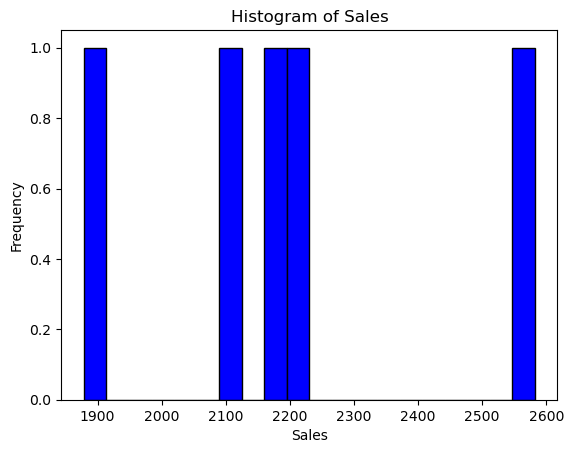

In [210]:
plt.hist(superstore_data['Sales'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


## Bar Plot - Compare categorical data:

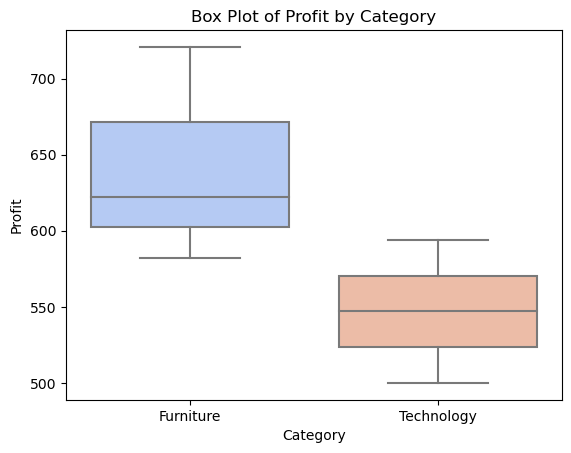

In [211]:
sns.boxplot(x='Category', y='Profit', data=superstore_data, palette='coolwarm')
plt.title('Box Plot of Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()


## Bar Plot - Compare categorical data:

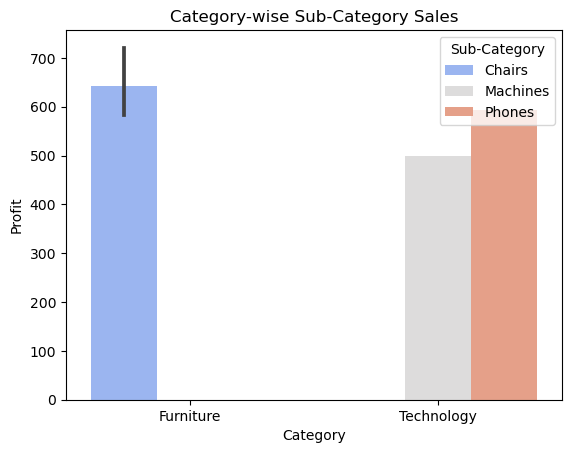

In [212]:
sns.barplot(x='Category', y='Profit', data=superstore_data, hue='Sub-Category', palette='coolwarm')
plt.title('Category-wise Sub-Category Sales')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.legend(title='Sub-Category')
plt.show()


# Pie Chart - Display the proportion of different categories:

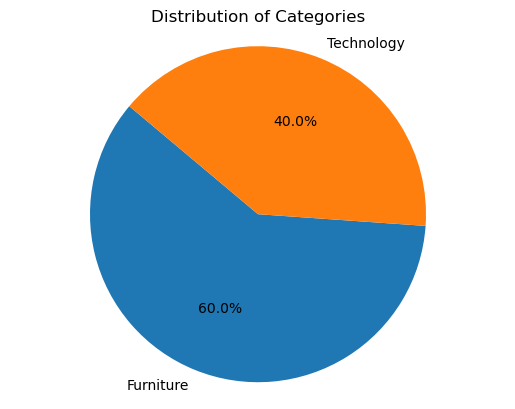

In [213]:
category_counts = superstore_data['Category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Categories')
plt.show()


## ## Violin Plot - Combine a box plot and a kernel density plot:

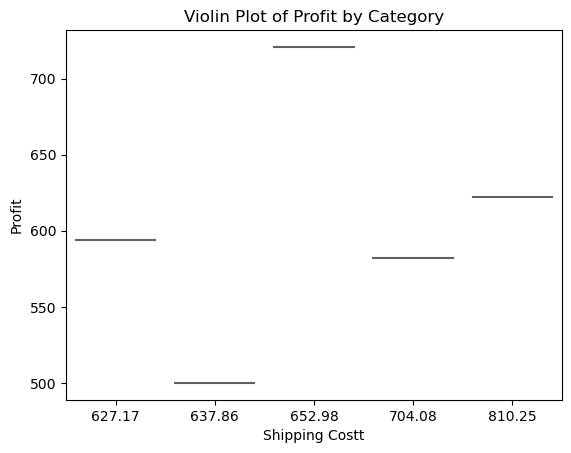

In [214]:
sns.violinplot(x='Shipping Cost', y='Profit', data=superstore_data, palette='coolwarm')
plt.title('Violin Plot of Profit by Category')
plt.xlabel('Shipping Costt')
plt.ylabel('Profit')
plt.show()


## Pairplot - Visualize pairwise relationships among multiple numerical variables:

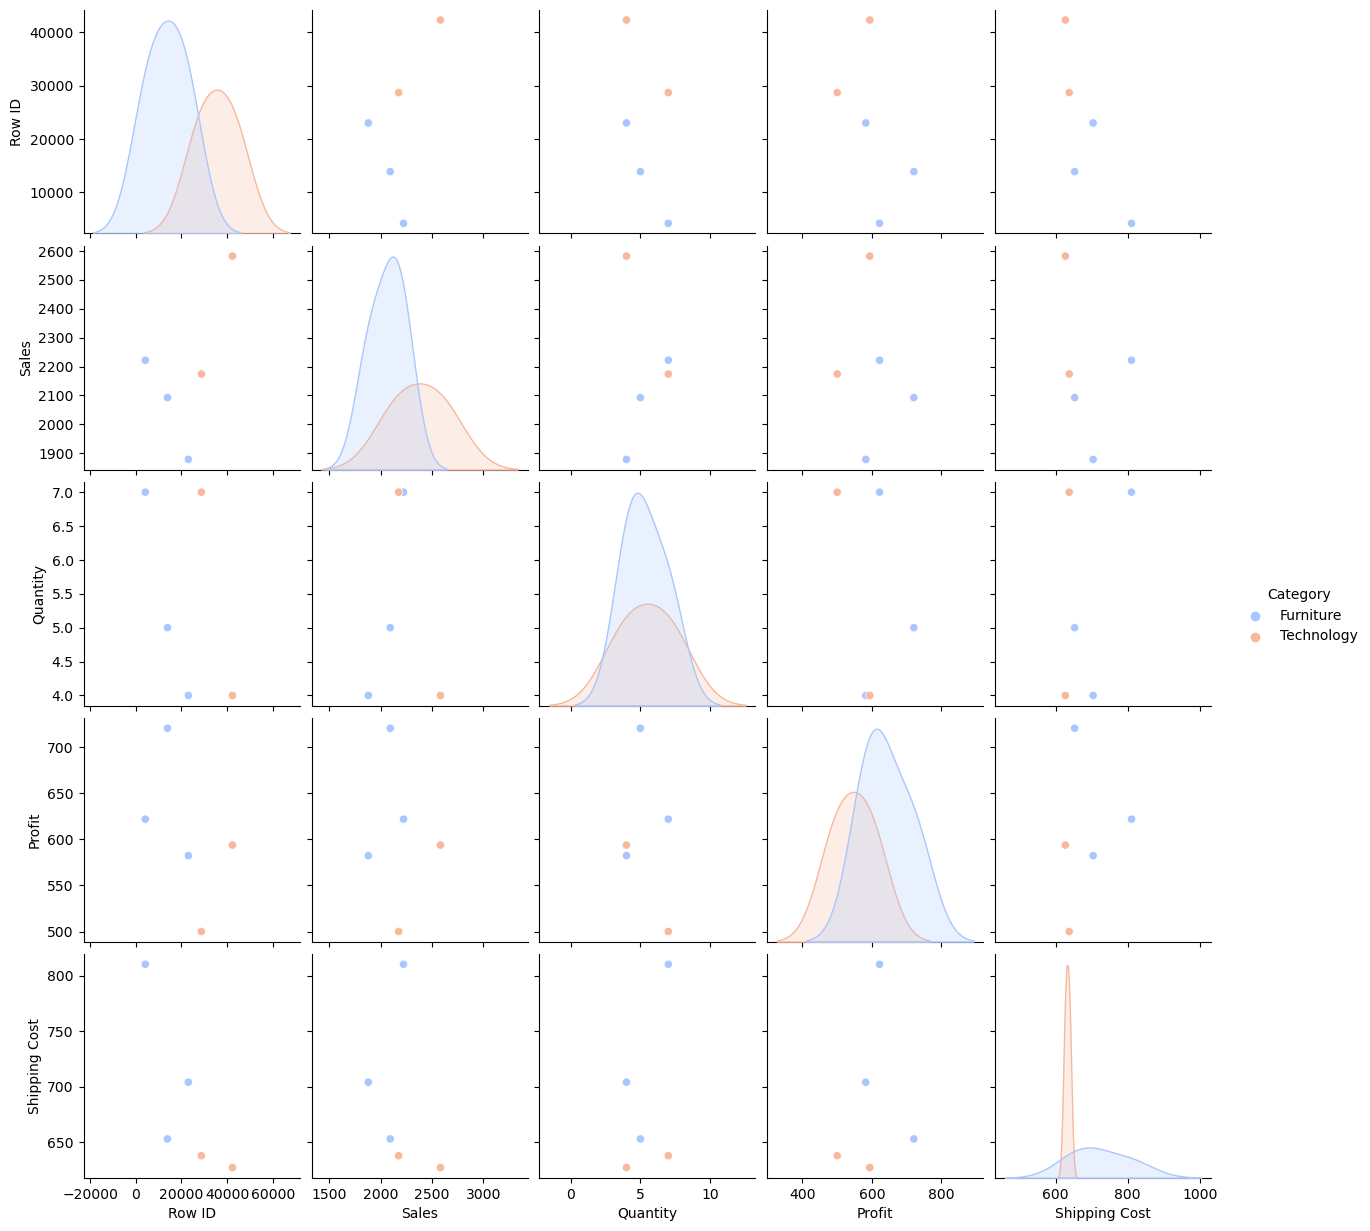

In [215]:
sns.pairplot(superstore_data, hue='Category', palette='coolwarm')
plt.show()


## Time Series Plot - Plot time series data:

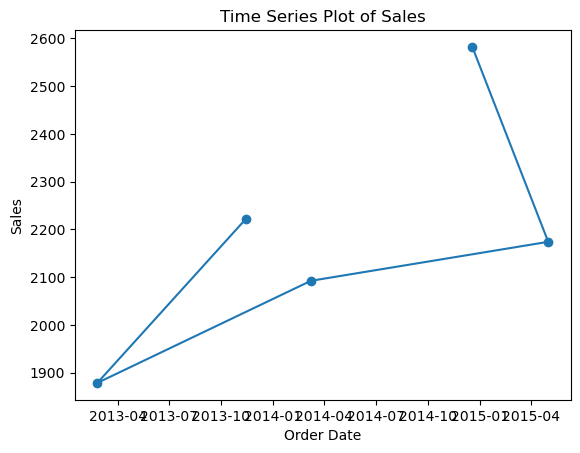

In [216]:
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])
plt.plot(superstore_data['Order Date'], superstore_data['Sales'], marker='o')
plt.title('Time Series Plot of Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()


## 3D Scatter Plot - Visualize three numerical variables in 3D space:

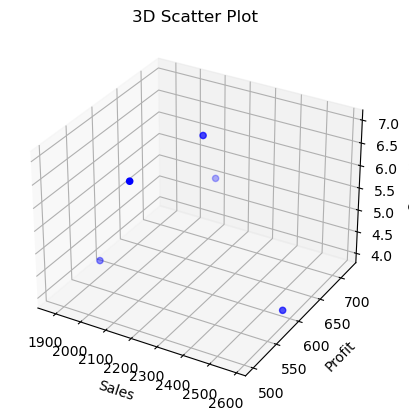

In [217]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(superstore_data['Sales'], superstore_data['Profit'], superstore_data['Quantity'], c='blue', marker='o')
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_zlabel('Quantity')
plt.title('3D Scatter Plot')
plt.show()


# Violin Plot with Split Violins - Compare distributions within categories:

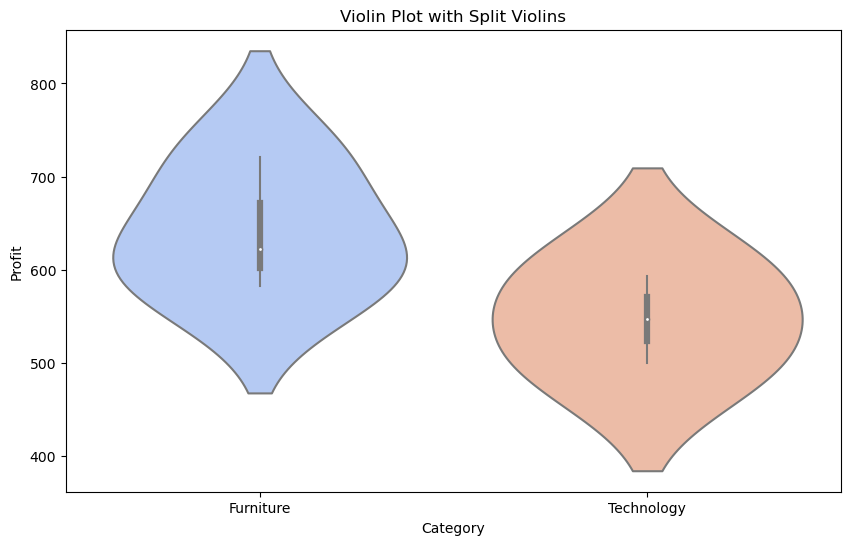

In [218]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Profit', data=superstore_data, split=True, palette='coolwarm')
plt.title('Violin Plot with Split Violins')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()


# Stacked Bar Chart - Show the composition of categories in different segments:

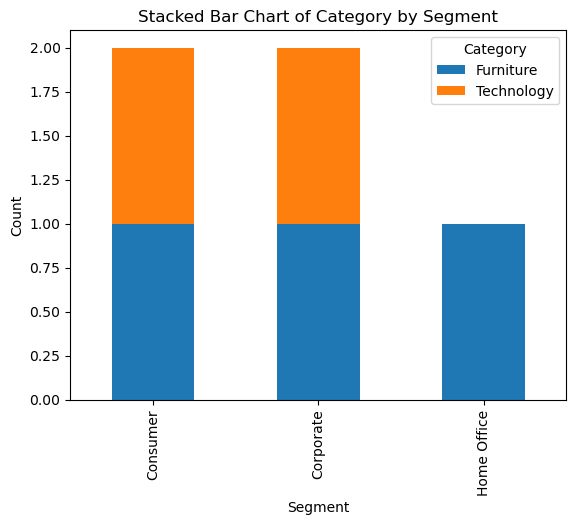

In [219]:
stacked_data = superstore_data.groupby(['Segment', 'Category']).size().unstack()
stacked_data.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Category by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()


# Geospatial Data Visualization - Plot data on a map (requires additional libraries like geopandas and matplotlib):

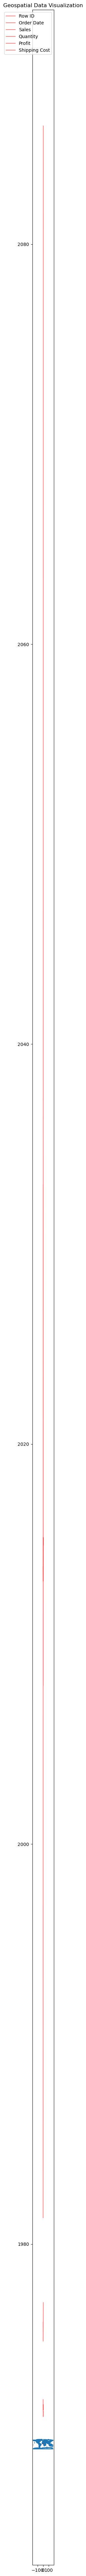

In [259]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.boundary.plot(figsize=(10, 102), linewidth=2)
superstore_data.plot(ax=ax, markersize=5, color='red', alpha=0.5)
plt.title('Geospatial Data Visualization')
plt.show()


## Grouped Bar Chart - Compare multiple variables using grouped bars:

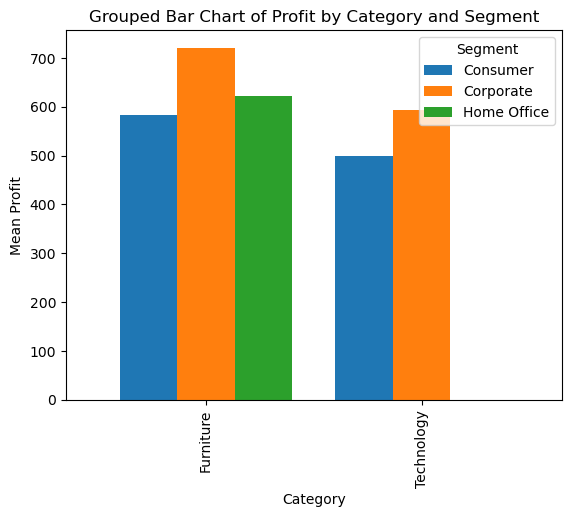

In [223]:
grouped_data = superstore_data.groupby(['Category', 'Segment'])['Profit'].mean().unstack()
grouped_data.plot(kind='bar', width=0.8)
plt.title('Grouped Bar Chart of Profit by Category and Segment')
plt.xlabel('Category')
plt.ylabel('Mean Profit')
plt.show()


## Count Plot - Count occurrences of categorical variables:

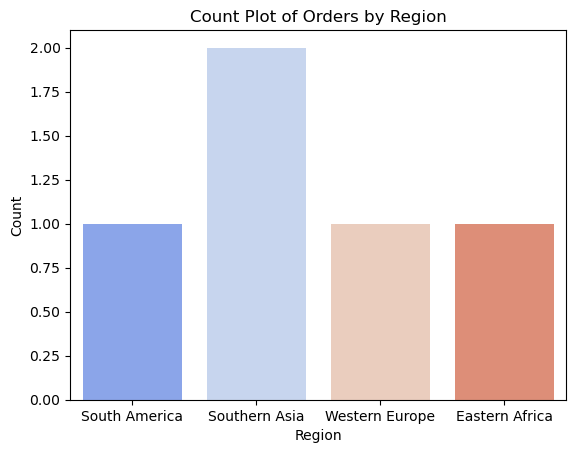

In [225]:
sns.countplot(x='Region', data=superstore_data, palette='coolwarm')
plt.title('Count Plot of Orders by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()
